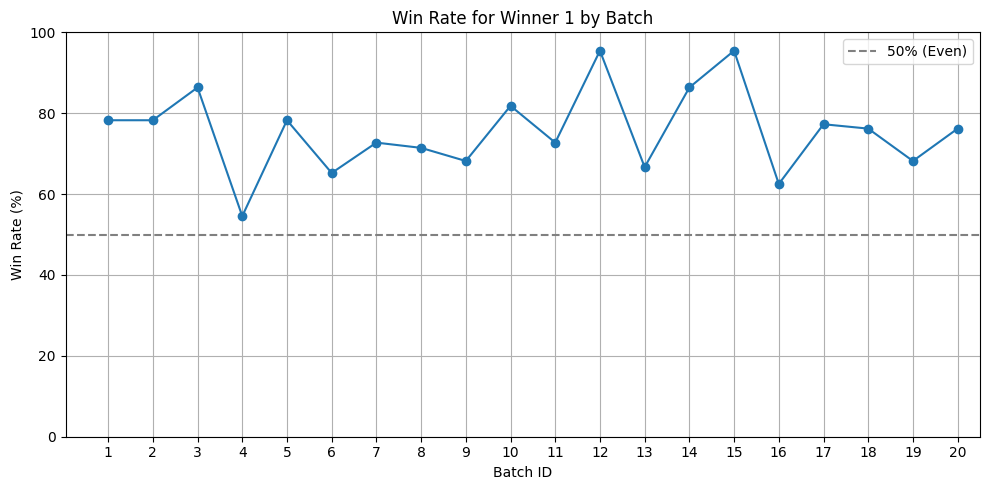

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Path to your episodes log database
DB_PATH = "current_episode_log.db"

# Connect and load data into DataFrame
with sqlite3.connect(DB_PATH) as conn:
    df = pd.read_sql_query("SELECT batch_id, winner FROM episodes WHERE winner IN (1, 2)", conn)

# Filter data to only include batch_id <= 20.0
#df = df[df['batch_id'] <= 20.0]

# Group by batch and count winners
counts = df.groupby(['batch_id', 'winner']).size().unstack(fill_value=0)

# Compute win rate for winner 1 as percentage
total_games = counts[1] + counts[2]
counts['winrate_1_percent'] = (counts[1] / total_games) * 100

# Plot
plt.figure(figsize=(10, 5))
plt.plot(counts.index, counts['winrate_1_percent'], marker='o', linestyle='-')
plt.title("Win Rate for Winner 1 by Batch")
plt.xlabel("Batch ID")
plt.ylabel("Win Rate (%)")
#plt.xlim(None, 20.5)
plt.ylim(0, 100)  # Set y-axis from 0 to 100%
plt.xticks(range(int(counts.index.min()), int(counts.index.max()) + 1))  # Set x-axis ticks to integers
plt.grid(True)
plt.axhline(50, color='gray', linestyle='--', label='50% (Even)')
plt.legend()
plt.tight_layout()
plt.show()
